In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [72]:
dropaveis = ['Unnamed: 0','NU_INSCRICAO','NU_ANO','Q027','Q029','Q030','Q031','Q032','Q033','Q028','Q041','NO_MUNICIPIO_RESIDENCIA',
            'SG_UF_RESIDENCIA','NO_MUNICIPIO_NASCIMENTO','SG_UF_NASCIMENTO','NO_MUNICIPIO_ESC','SG_UF_ESC','NO_ENTIDADE_CERTIFICACAO',
            'SG_UF_ENTIDADE_CERTIFICACAO','NO_MUNICIPIO_PROVA','SG_UF_PROVA','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC',
            'TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','TP_ENSINO','CO_ESCOLA','CO_MUNICIPIO_ESC',
            'CO_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','CO_UF_ENTIDADE_CERTIFICACAO',
            'CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT']
df.drop(dropaveis,inplace=True, axis=1)

In [73]:
perguntas = df.columns[84:]
for p in perguntas:
    df[p] = df[p].astype('category').cat.codes
df['CO_MUNICIPIO_NASCIMENTO'].fillna(0,inplace=True)
df['TP_ESTADO_CIVIL'].fillna(0,inplace=True)
df.dropna(inplace=True,subset=['TP_STATUS_REDACAO','NU_NOTA_MT','NU_NOTA_COMP1'])

In [74]:
df.head(10)

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q040,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,4314902,43,24,M,0.0,1,1,4314902.0,43.0,1,...,5,0,0,0,0,0,0,0,1,3
1,2304707,23,17,F,0.0,3,1,2304707.0,23.0,2,...,1,0,0,2,0,1,0,0,2,0
5,2902005,29,18,F,0.0,1,1,2933307.0,29.0,1,...,5,0,0,0,0,0,0,0,0,0
6,5102637,51,18,F,0.0,3,1,2804508.0,28.0,2,...,2,0,0,0,1,1,0,0,0,0
7,4301602,43,18,F,0.0,1,1,3550308.0,35.0,1,...,5,2,0,0,0,0,3,0,0,0
8,2601904,26,16,F,0.0,3,1,2601904.0,26.0,2,...,5,3,0,0,0,1,0,3,1,0
10,2603207,26,29,F,0.0,3,1,2603207.0,26.0,1,...,5,0,0,0,0,0,0,0,1,2
11,2111300,21,17,F,0.0,3,1,5300108.0,53.0,2,...,5,0,0,0,0,1,0,0,0,0
12,4314902,43,27,M,0.0,3,1,4314902.0,43.0,1,...,5,0,0,0,1,0,0,3,0,1
14,2401859,24,18,M,0.0,3,1,2411601.0,24.0,1,...,5,0,0,0,0,0,0,0,0,0


In [82]:
df.dropna(subset=['CO_UF_NASCIMENTO','NU_NOTA_CN','NU_NOTA_CH'],inplace=True)

In [75]:
df.shape

(10133, 126)

In [8]:
df['Q041'].astype('category').cat.codes.value_counts()

KeyError: 'Q041'

In [78]:
df['Q041'].value_counts()

KeyError: 'Q041'

In [77]:
df['Q041'].isnull().sum()
for p in perguntas:
    print(p, df[p].isnull().sum())

KeyError: 'Q041'

In [147]:
df['TP_ESTADO_CIVIL'].fillna(0,inplace=True)

In [83]:
df[df['CO_UF_NASCIMENTO'].isna()]

,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,...,Q040,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050


In [84]:
(df['TP_ESTADO_CIVIL'].value_counts()/df['TP_ESTADO_CIVIL'].value_counts().sum())*100

0.0    92.825436
1.0     6.328069
2.0     0.763910
3.0     0.082585
Name: TP_ESTADO_CIVIL, dtype: float64

In [85]:
colunas_com_nan = [i for i in df.columns if df[i].isnull().any()]
for c in colunas_com_nan:
    print(c, df[c].isna().sum())

In [35]:
df['CO_UF_NASCIMENTO']

0        43.0
1        23.0
5        29.0
6        28.0
7        35.0
         ... 
13725    35.0
13726     NaN
13727    43.0
13728    33.0
13729    41.0
Name: CO_UF_NASCIMENTO, Length: 10133, dtype: float64

In [329]:
df.dropna(inplace=True)
df[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']]

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,120.0,120.0,120.0,80.0,80.0
1,140.0,120.0,120.0,120.0,80.0
5,120.0,120.0,120.0,160.0,100.0
6,100.0,120.0,120.0,120.0,100.0
7,140.0,120.0,120.0,120.0,120.0
...,...,...,...,...,...
13724,140.0,120.0,120.0,120.0,120.0
13725,120.0,120.0,80.0,80.0,40.0
13727,120.0,120.0,120.0,120.0,120.0
13728,100.0,100.0,80.0,80.0,100.0


In [12]:
df.isna().sum().sum()

482

In [339]:
df[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']]

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,120.0,120.0,120.0,80.0,80.0
1,140.0,120.0,120.0,120.0,80.0
5,120.0,120.0,120.0,160.0,100.0
6,100.0,120.0,120.0,120.0,100.0
7,140.0,120.0,120.0,120.0,120.0
...,...,...,...,...,...
13725,120.0,120.0,80.0,80.0,40.0
13726,120.0,120.0,120.0,120.0,80.0
13727,120.0,120.0,120.0,120.0,120.0
13728,100.0,100.0,80.0,80.0,100.0


In [13]:
df[df['TP_PRESENCA_LC']==0]['NU_NOTA_LC'].isna().sum()

0

In [14]:
df[df['TP_PRESENCA_LC']==2]['NU_NOTA_LC'].isna().sum()

0

In [15]:
df[df['NU_NOTA_MT'].isna()]['NU_NOTA_CN'].isna().sum()

0

In [16]:
df[df['NU_NOTA_CH'].isna()]['NU_NOTA_MT'].isna().sum()

0

In [17]:
df['NU_NOTA_MT'].isna().sum()

0

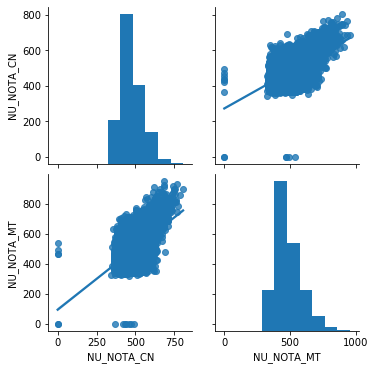

In [18]:
sns.pairplot(df,vars=['NU_NOTA_CN','NU_NOTA_MT'],kind='reg')

In [19]:
df.columns[84:]

Index(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q034',
       'Q035', 'Q036', 'Q037', 'Q038', 'Q039', 'Q040', 'Q042', 'Q043', 'Q044',
       'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050'],
      dtype='object')

In [20]:
df.isna().sum().sum()

482

<b>Tirar os NaN</b><br>
*Sem Nomalização e similares*

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
#Classificação
from sklearn.metrics import confusion_matrix, classification_report
#Regressao
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [89]:
df = pd.get_dummies(df)

In [ ]:
for col in df.columns:
    if col.dtype == 'float64':
        

In [94]:
X = df['NU_NOTA_MT']
Y = df.drop("NU_NOTA_MT",axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y) 

In [98]:
x_test.head(10)

4316     414.3
5200     459.3
12271    415.3
744      435.0
5326     353.1
6919     747.9
2867     500.7
8377     397.1
7878     369.7
11399    766.7
Name: NU_NOTA_MT, dtype: float64

In [105]:
lr = LinearRegression()
lr.fit(y_train, x_train)
predicted = lr.predict(y_test)

In [130]:
#print(mean_squared_error(x_test, predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(x_test, predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(x_test, predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_test, predicted)))

Mean Absolute Error: 59.70534504705856
Mean Squared Error: 5634.157573054238
Root Mean Squared Error: 75.06102565948748


In [128]:
print(x_test.shape)
print(predicted.shape)

(2422,)
(2422,)
